Задание просит найти приближение функции многочленом, решая систему линейных уравнений.  
Функция:

$f(x) = sin(\frac{x}{5})\;  \exp(\frac{x}{10})\; + 5  \exp(\frac{-x}{2})$
 
<img src="graph.jpg" width=400 align="left"/>

In [1]:
from scipy.linalg import solve
import numpy as np
import matplotlib.pyplot as plt

Исходная функция для построения графика в <code>pyplot</code>:

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

In [3]:
graph_x = np.arange(0, 16, 0.1)
graph_y = [f(x) for x in graph_x]

Координаты на оси абсцисс, через которые он должен пройти в разных версиях приближения:

In [4]:
lin = [1, 15]
sqr = [1, 8, 15]
cub = [1, 4, 10, 15]

Функция для вычисления коэффициентов СУ:

In [5]:
def vec_to_powered_sqmatrix(vec:list) ->np.ndarray:
    n = len(vec)
    coef_powers = np.repeat(np.arange(0,n), n).reshape(n,n)
    A = np.power(vec, coef_powers).T
    return A

Функция, чтобы избежать повторения кода для запихивания коэффициентов в <code>scipy.linalg.solve</code> и построения графика:

In [6]:
def sovle_und_plot_for(vec):
    A = vec_to_powered_sqmatrix(vec)
    b = np.array([f(x) for x in vec])
    sol = solve(A, b)

    plt.plot(A[:,1], b)
    plt.plot(graph_x, graph_y)
    plt.title(f"Приближение многочленом {len(b)-1} степени")
    plt.legend(["Приближение", "Оригинал"])
    plt.show();

    print(f"Корни: {', '.join(str(round(x,2)) for x in sol)}\n\n")

---

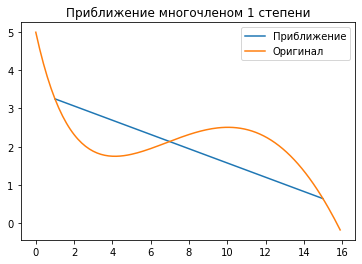

Корни: 3.44, -0.19




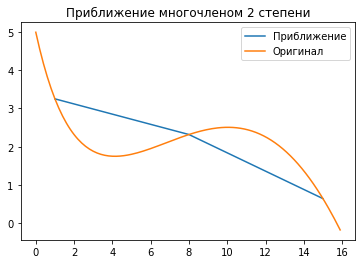

Корни: 3.33, -0.07, -0.01




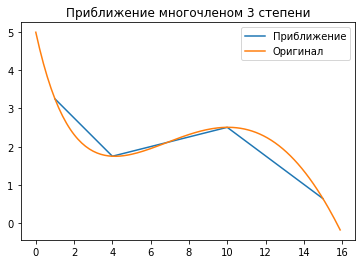

Корни: 4.36, -1.3, 0.19, -0.01




In [7]:
sovle_und_plot_for(lin)
sovle_und_plot_for(sqr)
sovle_und_plot_for(cub)

---

In [8]:
# запись ответов в файл
A = vec_to_powered_sqmatrix(cub)
b = np.array([f(x) for x in cub])

ans = [str(round(x, 2)) for x in solve(A[:,], b)]
ans = " ".join(ans)
with open("submission-2.txt", "w+") as s:
    s.write(ans)